Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential #The Sequential class in Keras is used to build sequential models, which are a linear stack of layers.
from keras.layers import Dense #Dense class in Keras is used to add a fully connected layer to a neural network. It is a layer where each neuron in the layer is connected to every neuron in the previous layer.
from sklearn.model_selection import train_test_split #"train_test_split" function in scikit-learn is used to split a dataset into training and testing subsets.
from sklearn.preprocessing import StandardScaler #"StandardScaler" class in scikit-learn is used for standardizing numerical features in a dataset

import warnings 
warnings.filterwarnings("ignore")

Loading the Data

In [2]:
card_transdata = pd.read_csv('card_transdata.csv')

Inspecting the data (e.g. number of rows/columns, type of data in different columns)

In [3]:
card_transdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
card_transdata.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
card_transdata.sample()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
15632,10.447559,0.834283,7.876048,1.0,1.0,0.0,0.0,0.0


In [6]:
card_transdata.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [7]:
card_transdata.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

4. Cleaning the data (check if cleaning is required: e.g. are there any missing values? are all the columns useful?)

In [8]:
card_transdata.isnull().sum().max()

0

In [9]:
print('No Frauds', round(card_transdata['fraud'].value_counts()[0]/len(card_transdata) * 100,2), '% of the dataset')
print('Frauds', round(card_transdata['fraud'].value_counts()[1]/len(card_transdata) * 100,2), '% of the dataset')

No Frauds 91.26 % of the dataset
Frauds 8.74 % of the dataset


Text(0.5, 1.0, 'Fraud Cases Distribution \n (0: No Fraud || 1: Fraud)')

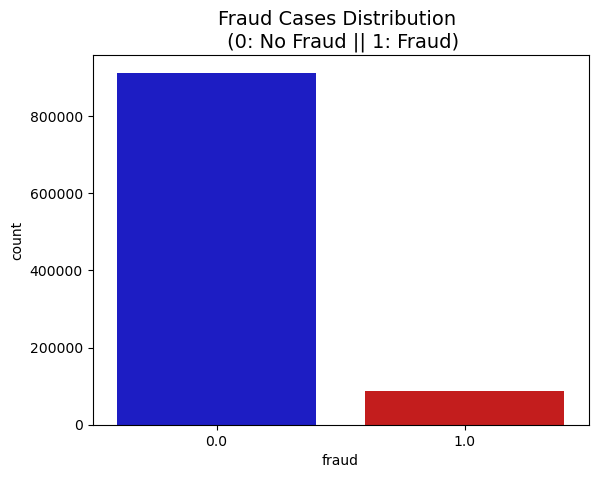

In [10]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('fraud', data=card_transdata, palette=colors)
plt.title('Fraud Cases Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)

5. Model training - Split the data into train and test sets, Train the model using training data, Test the model using test data

In [11]:
X = card_transdata.drop('fraud', axis=1)
y = card_transdata['fraud']

scaler = StandardScaler() #scaler is an instance of the "StandardScaler" class
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800000, 7)
(800000,)
(200000, 7)
(200000,)


In [14]:
model = Sequential() #Sequential() function creates an empty model that can be modified by adding layers

In [15]:
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) #add() method is used to add layers to the model
#64, specifies the number of neurons in the layer
#input_dim=X_train.shape[1], sets the input shape of the layer to the number of features in the training set
#activation='relu', specifies the activation function to be used in the layer

In [16]:
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #output of this layer will be a probability between 0 and 1 

In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='binary_crossentropy' - specifies the loss function to be used during training. Binary cross-entropy is a common loss function used for binary classification problems.
#optimizer='adam' - specifies the optimization algorithm. 
#metrics=['accuracy'] - specifies the evaluation metric to be used during training and testing. Accuracy is the ratio of the number of correct predictions to the total number of predictions made by the model

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
#fit method trains the model for a fixed number of epochs. In this case, model is trained for 5 epochs.
#batch_size=32 - the number of samples to be used in each batch during training. typically set as a power of 2, such as 32, 64, or 128
#history - contains information about the training process such as the loss and accuracy metrics for both the training and validation data

Epoch 1/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.0092 - val_accuracy: 0.9963
Epoch 2/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.0077 - accuracy: 0.9970 - val_loss: 0.0047 - val_accuracy: 0.9984
Epoch 3/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.0060 - val_accuracy: 0.9982
Epoch 4/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.0065 - val_accuracy: 0.9971
Epoch 5/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0052 - val_accuracy: 0.9977


6. Model evaluation

In [19]:
score = model.evaluate(X_test, y_test)
#evaluate method computes the loss value and any other specified metrics for the test data
#score will contain the computed loss value and the accuracy metric for the test data

6250/6250 [==============================] - 7s 1ms/step - loss: 0.0052 - accuracy: 0.9977


In [20]:
score

[0.0051899622194468975, 0.9977099895477295]

7. Visualize the accuracy and loss curves

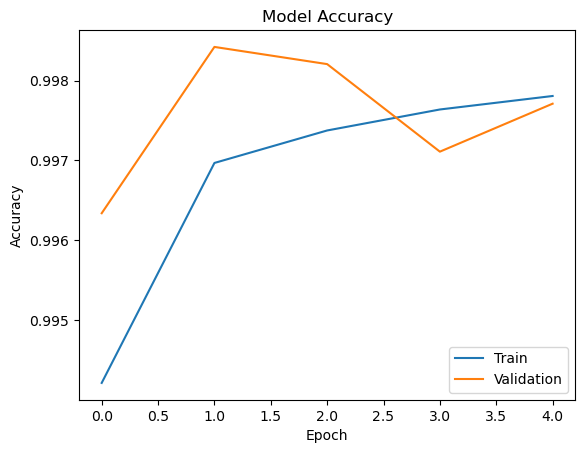

In [21]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

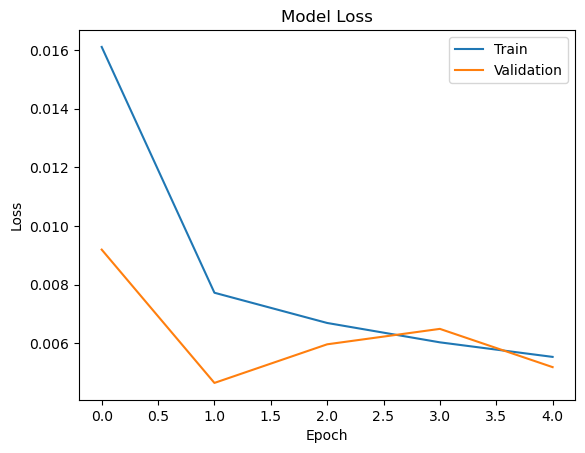

In [22]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()